In [1]:
%matplotlib inline

In [2]:
import os
import pickle
import random
import sys
from collections import defaultdict
from itertools import product

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from scipy.stats import rankdata
from tqdm.notebook import tqdm

sys.path.append('../../pygkernels')
from pygkernels.data import Datasets

from helpers import Datasets_Data, load_or_calc_and_save, perform_graph, ytrue_to_partition

# Prepare results of Datasets

In [3]:
data_hub = Datasets_Data()

In [4]:
@load_or_calc_and_save(f'{data_hub.CACHE_ROOT}/datasets_inits_bestparam_byari_individual_0.1.pkl')
def datasets_inits_bestparam_byari_individual():
    results = {}
    for dataset, kernel_name, graph_idx in tqdm(list(product(data_hub.datasets, data_hub.kernels_names, range(7)))):
        filename = f'{dataset}_{kernel_name}_results_{str(graph_idx).zfill(2)}.pkl'
        with open(f'{data_hub.DATASETS_RESULTS_ROOT}/by_column_and_kernel/{filename}', 'rb') as f:
            data = pickle.load(f)
        _, best_ari, _ = perform_graph(data)  # {scorename_initname: (best_param, init)}
        result = {si: init['score_ari'] for si, (_, init) in best_ari.items()}  # {scorename_initname: best_ari}
        results[(dataset, kernel_name, graph_idx)] = result
    return results

results = datasets_inits_bestparam_byari_individual() # {(dataset, kernel_name, graph_idx): {scorename_initname: best_ari}}

In [5]:
# table for modularity any3
results_m3_dka = defaultdict(lambda: defaultdict(list)) # {dataset, {kernel_name: [best_ari_for_graph]}}
for (dataset, kernel_name, graph_idx), si_ari in results.items():
    results_m3_dka[dataset][kernel_name].append(si_ari['modularity_any3'])
for dataset, kernel_name in product(data_hub.datasets, data_hub.kernel_names):  # {dataset, {kernel_name: best_ari}}
    results_m3_dka[dataset][kernel_name] = np.mean(results_m3_dka[dataset][kernel_name])

df = pd.DataFrame(results_m3_dka)
df.to_excel('./results/datasets_modularity_any3_bestparam_byari_individual.xlsx')

dataset_meanari = {k: np.mean(list(v.values())) for k, v in results_m3_dka.items()}  # {dataset, mean_mean_bestari}
for dataset, meanari in sorted(list(dataset_meanari.items()), key=lambda x: x[1]):
    print(f'{dataset}: {meanari:.2f}')

cora_Net: 0.18
cora_DB: 0.18
cora_EC: 0.27
cora_IR: 0.30
eu-core: 0.34
cora_HA: 0.38
news_5cl3_0.1: 0.42
news_5cl2_0.1: 0.49
cora_HCI: 0.51
news_5cl1_0.1: 0.61
news_3cl2_0.1: 0.62
news_3cl3_0.1: 0.66
news_2cl2_0.1: 0.67
polbooks: 0.69
sp_school_day_1: 0.72
news_3cl1_0.1: 0.73
news_2cl1_0.1: 0.73
polblogs: 0.73
sp_school_day_2: 0.74
eurosis: 0.74
news_2cl3_0.1: 0.83
football: 0.87
dolphins: 0.93
karate: 1.00


In [6]:
@load_or_calc_and_save(f'{data_hub.CACHE_ROOT}/datasets_modularity_0.1.pkl')
def datasets_modularity():
    modularity_results = {}
    for dataset in tqdm(list(data_hub.datasets)):  # dataset = column in this context
        A, y_true = Datasets()[dataset][0][0]
        partition = ytrue_to_partition(y_true)
        modularity = nx.community.modularity(nx.from_numpy_matrix(A), partition)
        modularity_results[dataset] = modularity
    return modularity_results

dataset_modularity = datasets_modularity()  # {dataset: modularity}

In [7]:
for dataset, modularity in sorted(list(dataset_modularity.items()), key=lambda x: x[1]):
    print(f'{dataset}: {modularity:.2f}')

cora_EC: 0.19
sp_school_day_1: 0.29
eu-core: 0.31
sp_school_day_2: 0.32
news_2cl2_0.1: 0.34
cora_Net: 0.35
karate: 0.37
dolphins: 0.37
news_2cl1_0.1: 0.38
cora_IR: 0.38
polblogs: 0.41
polbooks: 0.41
news_2cl3_0.1: 0.42
news_5cl3_0.1: 0.42
cora_DB: 0.43
news_3cl2_0.1: 0.46
news_5cl2_0.1: 0.50
news_3cl3_0.1: 0.51
news_3cl1_0.1: 0.53
cora_HCI: 0.53
football: 0.55
news_5cl1_0.1: 0.56
cora_HA: 0.61
eurosis: 0.70


Text(0, 0.5, 'ARI')

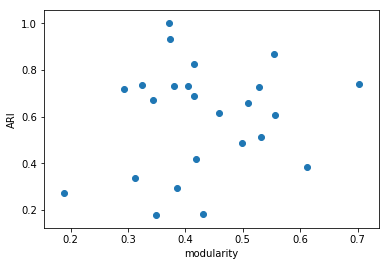

In [8]:
# draw ari-modularity dependency
x, y = [], []
for dataset in data_hub.datasets:
    x.append(dataset_modularity[dataset])
    y.append(dataset_meanari[dataset])
plt.scatter(x, y)
plt.xlabel('modularity')
plt.ylabel('ARI')

Text(0, 0.5, 'ARI')

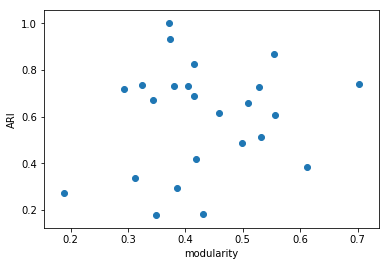

In [9]:
# draw ari-modularity dependency
x, y = [], []
for dataset in data_hub.datasets:
    x.append(dataset_modularity[dataset])
    y.append(dataset_meanari[dataset])
plt.scatter(x, y)
plt.xlabel('modularity')
plt.ylabel('ARI')